<a href="https://colab.research.google.com/github/HelloSwiat/AGH_Analiza_Danych/blob/main/Praca_zaliczeniowa_Analiza_Danych_w_Biznesie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Inicjowanie bibliotek


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 16.3 MB/s eta 0:00:00


In [2]:
# Instalacja dysku googla- gdzie przechowywany jest plik z danymi (wersja dla Colab'a)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2 Wczytanie oryginalnych baz danych

In [90]:
# ścieżka do plików z danymi

# ludność
file_path_L = '/content/drive/My Drive/Colab Notebooks/bkl21d.sav'

# pracodawcy
file_path_P = '/content/drive/My Drive/Colab Notebooks/bkl21f.sav'

In [87]:
# Pakiet do otwierania plików o innych formatach --> https://github.com/Roche/pyreadstat
!pip install pyreadstat
import pyreadstat
!pip install --no-cache-dir pyreadstat

In [88]:
# Wczytanie pliku z danymi nt. ludności
df_L, meta = pyreadstat.read_sav(file_path_L)

In [91]:
# Wczytanie pliku z danymi nt. pracodawców
# df_P, meta = pyreadstat.read_sav(file_path_P)

In [78]:
# Export the DataFrame to an Excel file
df_L.to_excel('bkl21d.xlsx', index=False)  # Set index=False to avoid writing row indices

# Download the Excel file (Colab specific)
from google.colab import files
files.download('bkl21d.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Export the DataFrame to an Excel file
df_L.to_excel('bkl21f.xlsx', index=False)  # Set index=False to avoid writing row indices

# Download the Excel file (Colab specific)
from google.colab import files
files.download('bkl21f.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# prompt: show me row number 0 in vertical column. Nie skracaj kolumny przez 3 kropki- pokaż całość

print(df_L.iloc[[0]].to_string(index=False))


    id      intid  waga_proba  waga_proba_kor    waga_pop  waga_pop_kor  rodzaj  edycja    rok    datawyw  powiat  woj  region  miejsce  miejsce_4k  powiat_operat  woj_operat  region_operat  miejsce_operat     m1  wiek  wiek_10k  wiek_6k  wiek_4k  wiek_3k  m2 prace praceteraz  BAEL_bezro  BAEL_praca  BAEL_aktyw  BAEL_sytzaw  BAEL_sytzaw2  bezrej  wykszt  wykszt_7k  wykszt_4k  wykszt_3k  matura  wyzsze  najwyzsze  uczy  uczy_gdzie  p1  p1_typ  p1_nrol  p1_rol  p2_pkd1  p2_pkd2  p2_pkd3  p2_pkd4  p2_pkd5  p2_1  p2_pkd_21k  p2_pkd_6k  p2_pkd_4k  p3_isco  p3_isco_d  p3_1  p3_2     p4   p5  p6  p6_1  p6_1x  p7_1  p7_2  p7_3  p7_4  p8  p9  p9_1  p9_1x  hp9_1_1  p9_2  p9_2x  hp9_2_1  p10a_00  p10a_01  p10a_02  p10a_03  p10a_04  p10a_05  p10a_06  p10a_07  p10a_08  p10a_09  p10a_10  p10a_11  p10a_12  p10a_13  p10a_14  p10a_15  p10a_15i  p10a_naj  p10b_00  p10b_01  p10b_02  p10b_03  p10b_04  p10b_05  p10b_06  p10b_07  p10b_08  p10b_09  p10b_10  p10b_11  p10b_12  p10b_13  p10b_14  p10b_15  p10b_1

In [7]:
headers = list(df_L.columns)
print(headers)

['id', 'intid', 'waga_proba', 'waga_proba_kor', 'waga_pop', 'waga_pop_kor', 'rodzaj', 'edycja', 'rok', 'datawyw', 'powiat', 'woj', 'region', 'miejsce', 'miejsce_4k', 'powiat_operat', 'woj_operat', 'region_operat', 'miejsce_operat', 'm1', 'wiek', 'wiek_10k', 'wiek_6k', 'wiek_4k', 'wiek_3k', 'm2', 'prace', 'praceteraz', 'BAEL_bezro', 'BAEL_praca', 'BAEL_aktyw', 'BAEL_sytzaw', 'BAEL_sytzaw2', 'bezrej', 'wykszt', 'wykszt_7k', 'wykszt_4k', 'wykszt_3k', 'matura', 'wyzsze', 'najwyzsze', 'uczy', 'uczy_gdzie', 'p1', 'p1_typ', 'p1_nrol', 'p1_rol', 'p2_pkd1', 'p2_pkd2', 'p2_pkd3', 'p2_pkd4', 'p2_pkd5', 'p2_1', 'p2_pkd_21k', 'p2_pkd_6k', 'p2_pkd_4k', 'p3_isco', 'p3_isco_d', 'p3_1', 'p3_2', 'p4', 'p5', 'p6', 'p6_1', 'p6_1x', 'p7_1', 'p7_2', 'p7_3', 'p7_4', 'p8', 'p9', 'p9_1', 'p9_1x', 'hp9_1_1', 'p9_2', 'p9_2x', 'hp9_2_1', 'p10a_00', 'p10a_01', 'p10a_02', 'p10a_03', 'p10a_04', 'p10a_05', 'p10a_06', 'p10a_07', 'p10a_08', 'p10a_09', 'p10a_10', 'p10a_11', 'p10a_12', 'p10a_13', 'p10a_14', 'p10a_15', 'p

# 3 Duplikacja i "ważenie" bazy danych

## Duplikowanie bazy

In [21]:
# prompt: create a copy of df_L
df_L1 = df_L.copy()
# df_P1 = df_P.copy()

## "Ważenie" zmiennych

In [19]:
#TBD

# 4 Zapoznanie się z danymi

## Podgląd przykładowych zmiennych

Jak zobaczyć wartości które przyjmuje dana zmienna i jak są kodowane?

In [71]:
# kilka pierwszych lub ostatnich wartości danej zmiennej można obejrzeć w ten sposób:
df_L1['edycja'].head(10)

,edycja
0,2021.0
1,2021.0
2,2021.0
3,2021.0
4,2021.0
5,2021.0
6,2021.0
7,2021.0
8,2021.0
9,2021.0


In [72]:
df_L1['id'].head()

,id
0,6590.0
1,6591.0
2,6592.0
3,6593.0
4,6594.0


In [92]:
# Display basic summary statistics of the DataFrame
print(df_L.info())
print(df_L.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529 entries, 0 to 2528
Columns: 910 entries, id to dokszt_all_bo
dtypes: float64(906), object(4)
memory usage: 17.6+ MB
None
                id   waga_proba  waga_proba_kor      waga_pop  waga_pop_kor  \
count  2529.000000  2529.000000     2529.000000   2529.000000   2529.000000   
mean   7854.000000     1.000000        1.000000   9965.778964   9965.778964   
std     730.203739     0.446621        0.414533   4450.930974   4131.146452   
min    6590.000000     0.253951        0.257240   2530.815789   2563.595820   
25%    7222.000000     0.733557        0.743058   7310.466667   7405.154444   
50%    7854.000000     0.906111        0.917848   9030.105263   9147.066414   
75%    8486.000000     1.223727        1.239577  12195.388889  12353.347924   
max    9118.000000     2.835938        2.003588  28262.333333  19967.316869   

            rodzaj  edycja          rok       powiat          woj  ...  \
count  2529.000000  2529.0  2529.00000

### Metryczka

In [103]:
# meta.variable_value_labels['region'].items()

In [93]:
# prompt: show variable_value_labels for variable "region"

for key, value in meta.variable_value_labels['region'].items():
    print(f"{key}: {value}")


1.0: Centralny (łódz/śwkrz)
2.0: Północno-Zachodni (lubus/wlkp/zachpom)
3.0: Północny (kuj-pom/pom/warm-maz)
4.0: Południowo-Zachodni (dlnśl/opol)
5.0: Południowy (małop/śl)
6.0: Woj. mazowieckie
7.0: Wschodni (lubel/podkarp/podl)


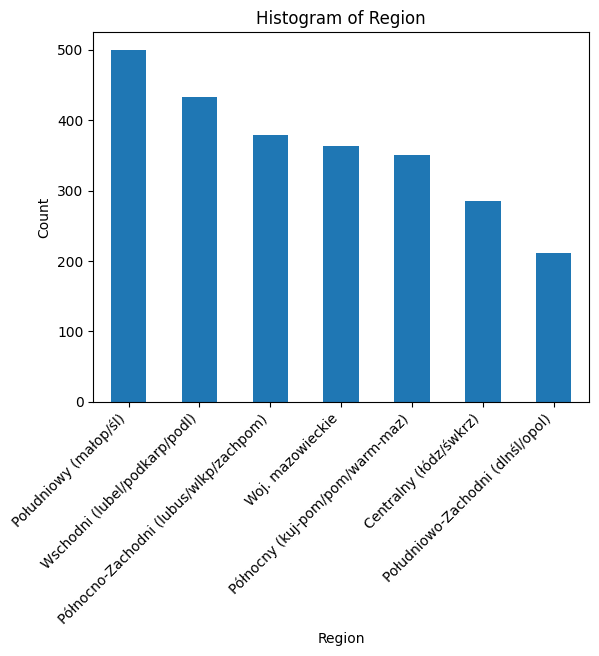

In [98]:
# prompt: draw histogram with variable "region" from df_1

# https://stat.gov.pl/statystyka-regionalna/jednostki-terytorialne/klasyfikacja-nuts/klasyfikacja-nuts-w-polsce/
# https://stat.gov.pl/download/gfx/portalinformacyjny/pl/defaultstronaopisowa/5872/1/1/klasyfikacja-nuts-w-polsce-2003-2021.xls

# Create a dictionary to map region codes to region names
region_mapping = meta.variable_value_labels['region']


df_L1['region'].value_counts().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Histogram of Region')

# Customize x-axis labels with region names
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
labels = [region_mapping.get(x, str(x)) for x in df_L1['region'].value_counts().index] # Use mapping or original value if no mapping exists
plt.gca().set_xticklabels(labels)

plt.show()

In [99]:
for key, value in meta.variable_value_labels['wiek_10k'].items():
    print(f"{key}: {value}")

1.0: 18-24
2.0: 25-29
3.0: 30-34
4.0: 35-39
5.0: 40-44
6.0: 45-49
7.0: 50-54
8.0: 55-59
9.0: 60-64
10.0: 65-69


In [101]:
# Histogram dla wieku respondetów


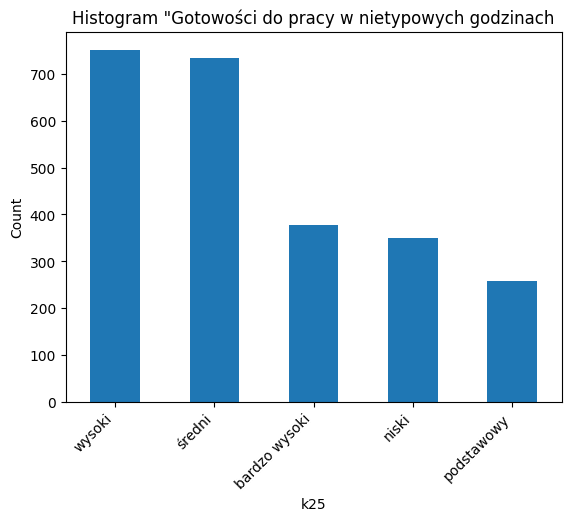

In [113]:
k25_mapping = meta.variable_value_labels['k25']


df_L1['k25'].value_counts().plot(kind='bar')
plt.xlabel('k25')
plt.ylabel('Count')
plt.title('Histogram "Gotowości do pracy w nietypowych godzinach')

# Customize x-axis labels with region names
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
labels = [k25_mapping.get(x, str(x)) for x in df_L1['k25'].value_counts().index] # Use mapping or original value if no mapping exists
plt.gca().set_xticklabels(labels)

plt.show()

In [115]:
for key, value in meta.variable_value_labels['m2'].items():
    print(f"{key}: {value}")

0.0: mężczyzna
1.0: kobieta


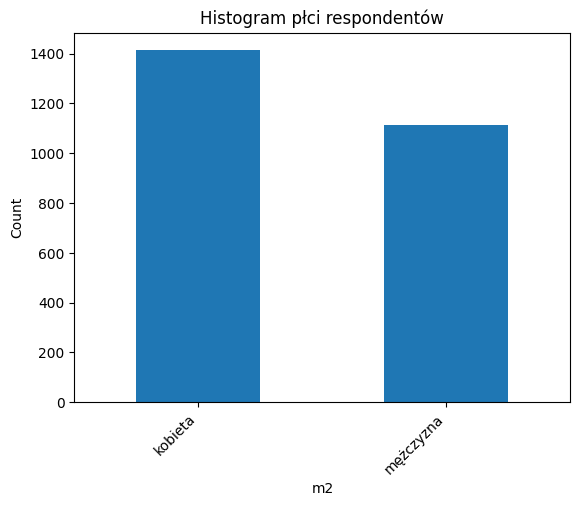

In [116]:
m2_mapping = meta.variable_value_labels['m2']

df_L1['m2'].value_counts().plot(kind='bar')
plt.xlabel('m2')
plt.ylabel('Count')
plt.title('Histogram płci respondentów')

# Customize x-axis labels with region names
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
labels = [m2_mapping.get(x, str(x)) for x in df_L1['m2'].value_counts().index] # Use mapping or original value if no mapping exists
plt.gca().set_xticklabels(labels)

plt.show()

In [108]:
for key, value in meta.variable_value_labels['edycja'].items():
    print(f"{key}: {value}")

2017.0: BKL 2017
2019.0: BKL 2019
2021.0: BKL 2021 (realizowany 2021-2022)


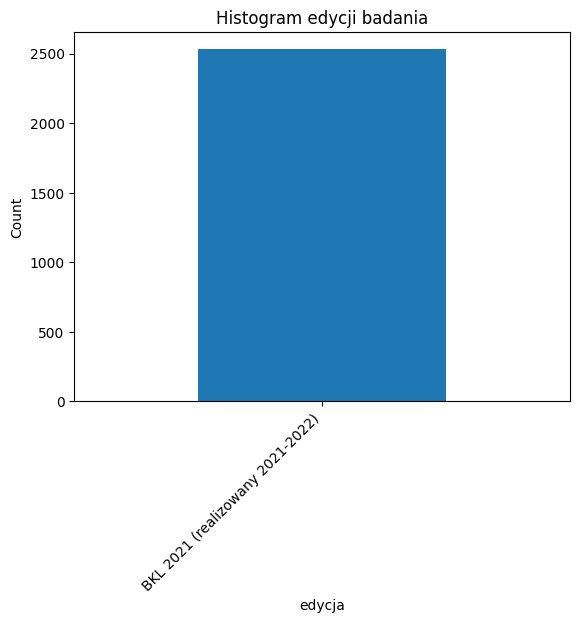

In [117]:
edycja_mapping = meta.variable_value_labels['edycja']

df_L1['edycja'].value_counts().plot(kind='bar')
plt.xlabel('edycja')
plt.ylabel('Count')
plt.title('Histogram edycji badania')

# Customize x-axis labels with region names
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
labels = [edycja_mapping.get(x, str(x)) for x in df_L1['edycja'].value_counts().index] # Use mapping or original value if no mapping exists
plt.gca().set_xticklabels(labels)

plt.show()

In [109]:
for key, value in meta.variable_value_labels['miejsce'].items():
    print(f"{key}: {value}")

1.0: wieś (teren niezurbanizowany)
2.0: miasto do 9 999
3.0: miasto 10 000 - 19 999
4.0: miasto 20 000 - 49 999
5.0: miasto 50 000 - 99 999
6.0: miasto 100 000 - 199 999
7.0: miasto 200 000 - 499 999
8.0: miasto 500 000 +
9.0: Warszawa


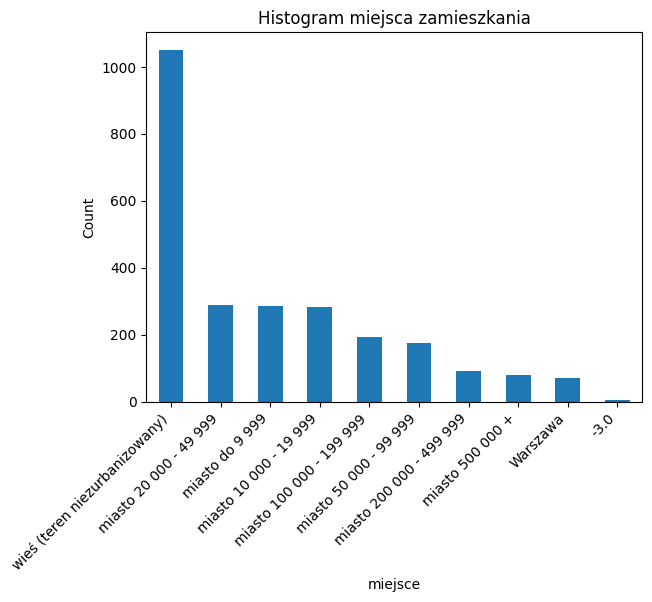

In [118]:
miejsce_mapping = meta.variable_value_labels['miejsce']

df_L1['miejsce'].value_counts().plot(kind='bar')
plt.xlabel('miejsce')
plt.ylabel('Count')
plt.title('Histogram miejsca zamieszkania')

# Customize x-axis labels with region names
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
labels = [miejsce_mapping.get(x, str(x)) for x in df_L1['miejsce'].value_counts().index] # Use mapping or original value if no mapping exists
plt.gca().set_xticklabels(labels)

plt.show()

In [119]:
for key, value in meta.variable_value_labels['wykszt_7k'].items():
    print(f"{key}: {value}")

1.0: gimnazjalne i poniżej
2.0: zasadnicze zawodowe
3.0: średnie ogólnokształcące
4.0: średnie zawodowe (liceum, technikum)
5.0: średnie (szkoła polic, inna nie wyższa)
6.0: wyższe (licencjat/inż.)
7.0: wyższe (mgr)


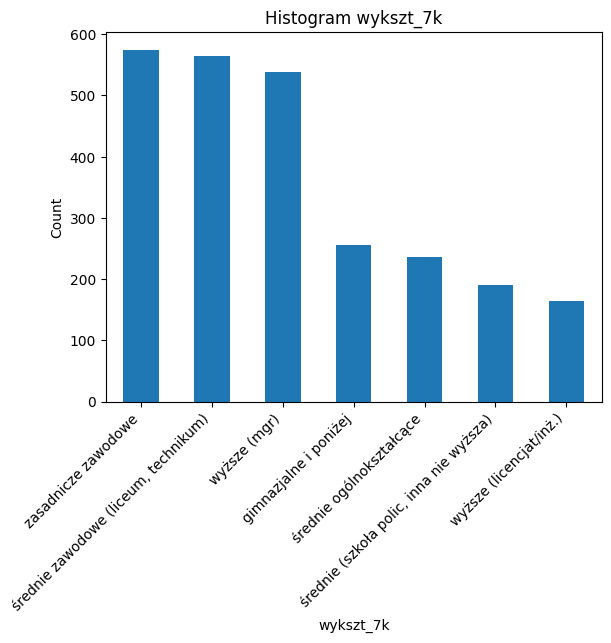

In [123]:
wykszt_7k_mapping = meta.variable_value_labels['wykszt_7k']

df_L1['wykszt_7k'].value_counts().plot(kind='bar')
plt.xlabel('wykszt_7k')
plt.ylabel('Count')
plt.title('Histogram wykszt_7k')

# Customize x-axis labels with region names
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
labels = [wykszt_7k_mapping.get(x, str(x)) for x in df_L1['wykszt_7k'].value_counts().index] # Use mapping or original value if no mapping exists
plt.gca().set_xticklabels(labels)

plt.show()

In [120]:
for key, value in meta.variable_value_labels['wykszt_4k'].items():
    print(f"{key}: {value}")

1.0: gimnazjalne i poniżej
2.0: zasadnicze zawodowe
3.0: średnie
4.0: wyższe


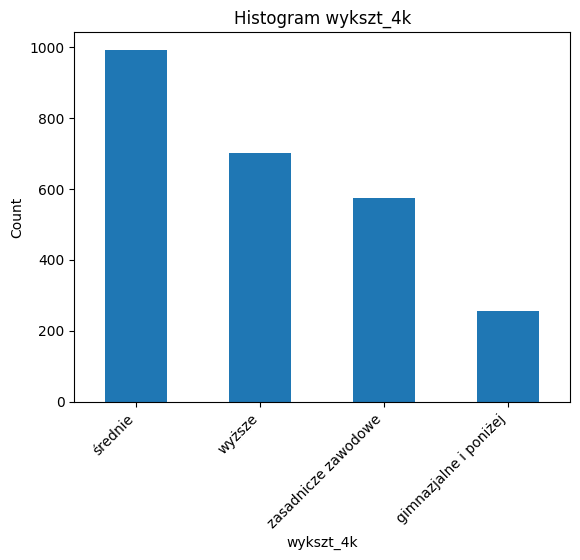

In [124]:
wykszt_4k_mapping = meta.variable_value_labels['wykszt_4k']

df_L1['wykszt_4k'].value_counts().plot(kind='bar')
plt.xlabel('wykszt_4k')
plt.ylabel('Count')
plt.title('Histogram wykszt_4k')

# Customize x-axis labels with region names
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
labels = [wykszt_4k_mapping.get(x, str(x)) for x in df_L1['wykszt_4k'].value_counts().index] # Use mapping or original value if no mapping exists
plt.gca().set_xticklabels(labels)

plt.show()

### Soft skills

In [126]:
# Łatwe nawiązywanie kontaktów z ludźmi

for key, value in meta.variable_value_labels['k17'].items():
    print(f"{key}: {value}")

-8.0: trudno powiedzieć
-7.0: odmowa odpowiedzi
-3.0: brak danych
-1.0: NDT
1.0: niski
2.0: podstawowy
3.0: średni
4.0: wysoki
5.0: bardzo wysoki


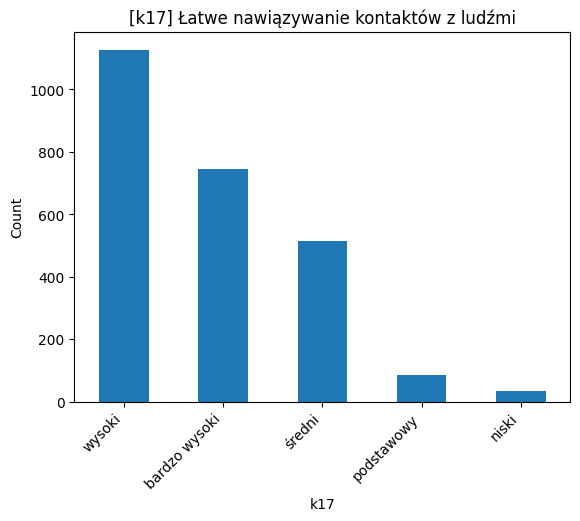

In [139]:
k17_mapping = meta.variable_value_labels['k17']

df_L1['k17'].value_counts().plot(kind='bar')
plt.xlabel('k17')
plt.ylabel('Count')
plt.title('[k17] Łatwe nawiązywanie kontaktów z ludźmi')

# Customize x-axis labels with region names
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
labels = [k17_mapping.get(x, str(x)) for x in df_L1['k17'].value_counts().index] # Use mapping or original value if no mapping exists
plt.gca().set_xticklabels(labels)

plt.show()

In [128]:
# Biegłe posługiwanie się jęz. polskim w mowie i piśmie (poprawność językowa, bogate słownictwo, łatwość wysławiania się)

for key, value in meta.variable_value_labels['k23'].items():
    print(f"{key}: {value}")

-8.0: trudno powiedzieć
-7.0: odmowa odpowiedzi
-3.0: brak danych
-1.0: NDT
1.0: niski
2.0: podstawowy
3.0: średni
4.0: wysoki
5.0: bardzo wysoki


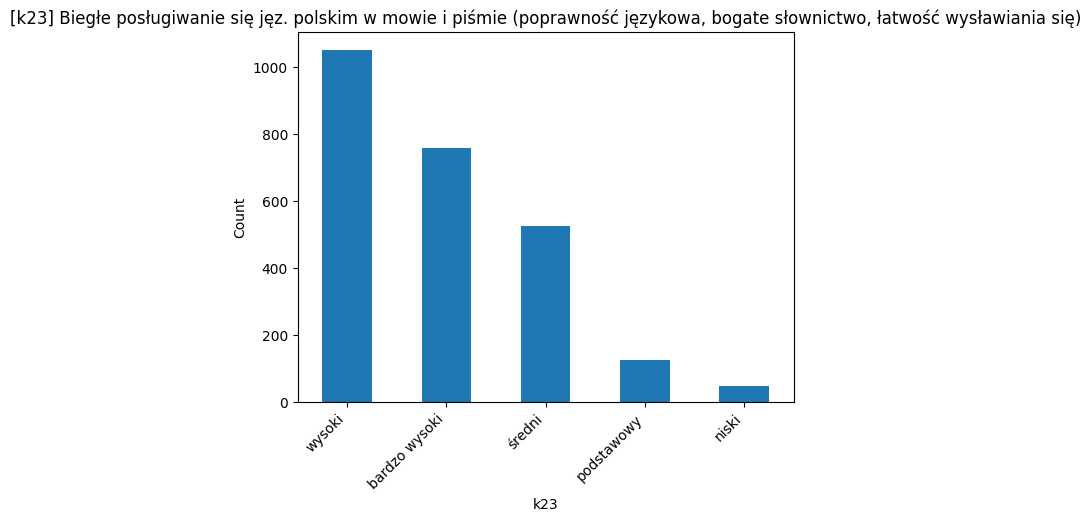

In [138]:
k23_mapping = meta.variable_value_labels['k23']

df_L1['k23'].value_counts().plot(kind='bar')
plt.xlabel('k23')
plt.ylabel('Count')
plt.title('[k23] Biegłe posługiwanie się jęz. polskim w mowie i piśmie (poprawność językowa, bogate słownictwo, łatwość wysławiania się)')

# Customize x-axis labels with region names
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
labels = [k23_mapping.get(x, str(x)) for x in df_L1['k23'].value_counts().index] # Use mapping or original value if no mapping exists
plt.gca().set_xticklabels(labels)

plt.show()

In [136]:
# Gotowość do pracy w nietypowych godzinach wymaganych przez pracodawcę

for key, value in meta.variable_value_labels['k25'].items():
    print(f"{key}: {value}")

-8.0: trudno powiedzieć
-7.0: odmowa odpowiedzi
-3.0: brak danych
-1.0: NDT
1.0: niski
2.0: podstawowy
3.0: średni
4.0: wysoki
5.0: bardzo wysoki


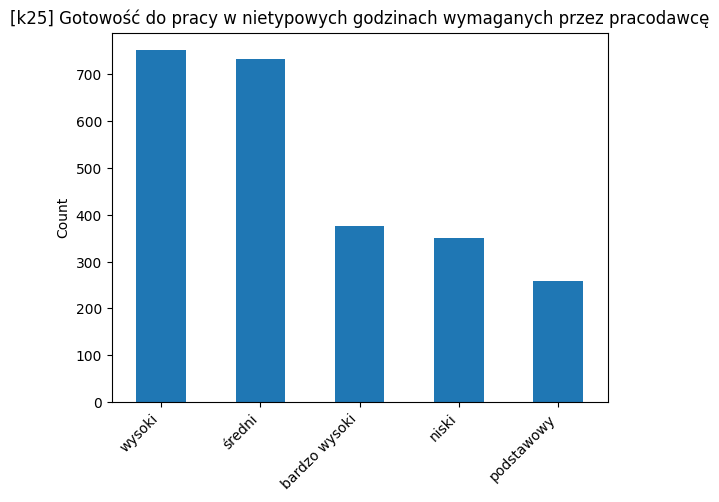

In [137]:
k25_mapping = meta.variable_value_labels['k25']

df_L1['k25'].value_counts().plot(kind='bar')
plt.xlabel('')
plt.ylabel('Count')
plt.title('[k25] Gotowość do pracy w nietypowych godzinach wymaganych przez pracodawcę')

# Customize x-axis labels with region names
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
labels = [k23_mapping.get(x, str(x)) for x in df_L1['k25'].value_counts().index] # Use mapping or original value if no mapping exists
plt.gca().set_xticklabels(labels)

plt.show()

### Hipoteza H2: Zadowolenie

In [146]:
# prompt: what is the scale of values in the variable j1_01

for key, value in meta.variable_value_labels['j1_01'].items():
  print(f"{key}: {value}")

-8.0: trudno powiedzieć
-7.0: odmowa odpowiedzi
-3.0: brak danych
-1.0: NDT
1.0: bardzo niezadowolony
2.0: raczej niezadowolony
3.0: ani niezadowolony, ani zadowolony
4.0: raczej zadowolony
5.0: bardzo zadowolony


In [149]:
for key, value in meta.variable_value_labels['j1_10'].items():
  print(f"{key}: {value}")

-8.0: trudno powiedzieć
-7.0: odmowa odpowiedzi
-3.0: brak danych
-1.0: NDT
1.0: bardzo niezadowolony
2.0: raczej niezadowolony
3.0: ani niezadowolony, ani zadowolony
4.0: raczej zadowolony
5.0: bardzo zadowolony


### Elastyczność i inne

In [ ]:
# prompt: how to filter df_1 to see only the lines with p3_isco2 value equal to 71

# Pokaż dane tylko tych osób, które w zmiennej p3_isco2 mają wartość 71 (własna działalnośc + budowlanka)

df_filtered = df_1[df_1['p3_isco2'] == 71]
df_filtered


### Zawody

### 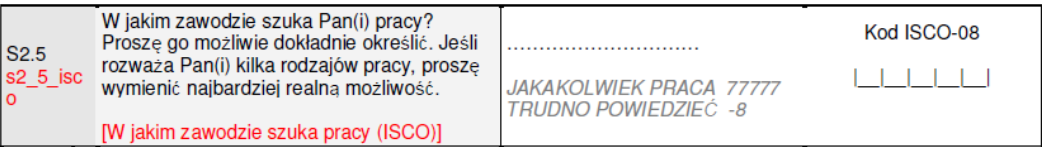

In [ ]:
# lista zawodów wg. 6-cio cyfrowej skali isco
for key, value in meta.variable_value_labels['wykszt_4k'].items():
    print(f"{key}: {value}")

In [ ]:
# lista zawodów wg. 5 cyfrowej skali isco
for key, value in meta.variable_value_labels['wykszt_4k'].items():
    print(f"{key}: {value}")

In [ ]:
# lista zawodów wg. 6 cyfrowej skali isco
for key, value in meta.variable_value_labels['s2_5_isco'].items():
    print(f"{key}: {value}")

df_L1['s2_5_isco'].value_counts().plot(kind='bar')
plt.xlabel('S2_5_isco')
plt.ylabel('Count')
plt.title('s2_5_isco')
plt.show()

In [ ]:
# lista zawodów wg. 5 cyfrowej skali isco
for key, value in meta.variable_value_labels['wykszt_4k'].items():
    print(f"{key}: {value}")

In [ ]:
for key, value in meta.variable_value_labels['p3_isco2'].items():
    print(f"{key}: {value}")

In [ ]:
for key, value in meta.variable_value_labels['p3_isco4'].items():
    print(f"{key}: {value}")

### Wykształcenie

### Sytuacja zawodowa- gotowość do podjęcia pracy (?)

In [37]:
# Sytuacja zawodowa (BAEL)
for key, value in meta.variable_value_labels['BAEL_sytzaw'].items():
    print(f"{key}: {value}")

0.0: pracujący
1.0: bezrobotni
2.0: nieaktywni


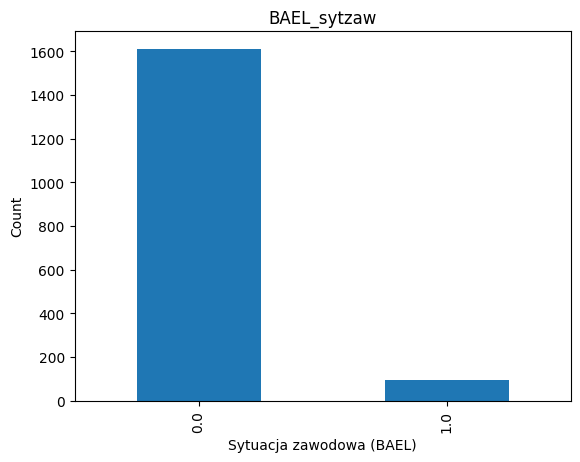

In [36]:
df_L1['BAEL_sytzaw'].value_counts().plot(kind='bar')
plt.xlabel('Sytuacja zawodowa (BAEL)')
plt.ylabel('Count')
plt.title('BAEL_sytzaw')
plt.show()

In [ ]:
for key, value in meta.variable_value_labels['z4_2'].items():
    print(f"{key}: {value}")

## Zmienne wykorzystane w analizie



In [ ]:
list_of_used_var = ["id", "region", "m1","wiek","wiek_10k","m2"]
for list_of_used_var in list_of_used_var:
  print(list_of_used_var)

# 5 Czyszczenie danych

## Braki danych

In [73]:
# Calculate the number of rows with missing data
rows_with_missing_data = df_L1.isnull().any(axis=1).sum()
print(f"Number of rows with missing data: {rows_with_missing_data}")

Number of rows with missing data: 2529


In [74]:
# Display variables with missing data
missing_data = df_L1.isnull().sum()
print(missing_data[missing_data > 0])

# Zmienne do wyłączenia z analizy z powodu dużej ilości brakujących danych:
## BAEL_sytzaw
## bezrej
## zawod1...4
## DOKSZTAŁCANIE

region              6
miejsce_4k          6
wiek_10k            1
BAEL_sytzaw       821
bezrej            811
                 ... 
zawod1            448
zawod2            259
zawod3            259
zawod4            259
DOKSZTAŁCANIE    2529
Length: 670, dtype: int64


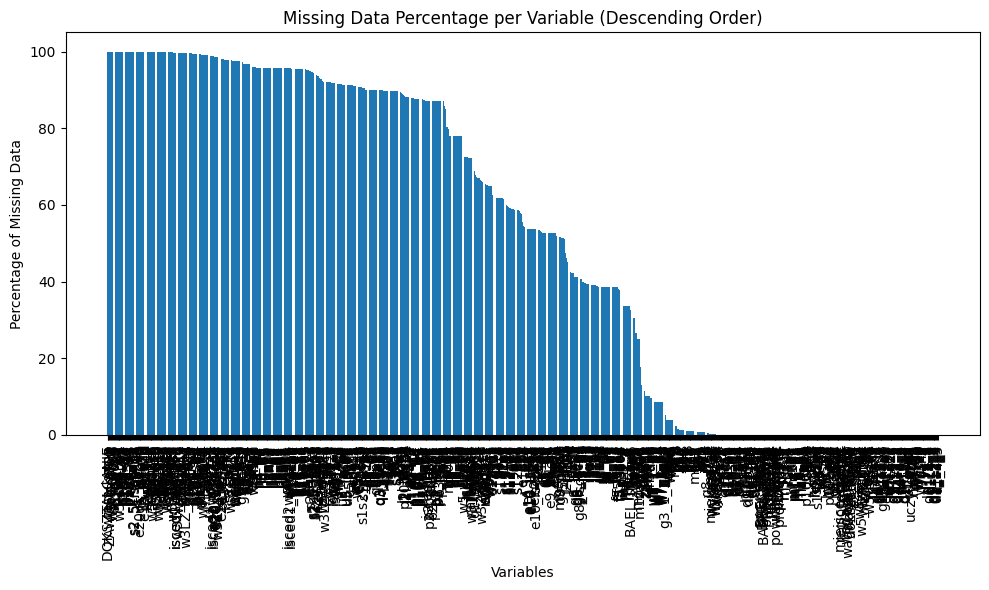

In [75]:
# Assuming 'missing_percentage' is already calculated as in your provided code
# missing_data = df_L1.isnull().sum()
# total_rows = len(df_L1)
# missing_percentage = (missing_data / total_rows) * 100

# Sort missing data in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(missing_percentage_sorted.index, missing_percentage_sorted.values)
plt.xlabel("Variables")
plt.ylabel("Percentage of Missing Data")
plt.title("Missing Data Percentage per Variable (Descending Order)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [68]:
# Assuming 'df_L1' is your DataFrame and 'missing_percentage' is calculated as in your provided code
# Calculate missing percentage if not already calculated
missing_data = df_L1.isnull().sum()
total_rows = len(df_L1)
missing_percentage = (missing_data / total_rows) * 100

# Sort variables by missing percentage in descending order and get the top 10
top_x_missing = missing_percentage.sort_values(ascending=False)

# Print the top 10 variables with the highest missing data ratio
print("Top 10 variables with the biggest missing data ratio:")
top_10_missing


Top 10 variables with the biggest missing data ratio:


,0
DOKSZTAŁCANIE,100.0
test_komp,100.0
m5_3,100.0
ZAWODY_ISCO,100.0
test_slow,100.0
w5_6_abs5,100.0
w5_6_abs6,100.0
w5_7_6,100.0
p3_isco_d,100.0
p10b_10,100.0


In [66]:
# prompt: to export above list  of missing data as excel file

# Assuming 'missing_percentage' is already calculated as in your provided code
# and 'top_x_missing' contains the Series with missing data percentages

# Convert the Series to a DataFrame for easier export
missing_data_df = top_x_missing.reset_index()
missing_data_df.columns = ['Variable', 'Missing Percentage']

# Export the DataFrame to an Excel file
missing_data_df.to_excel('missing_data.xlsx', index=False)


In [63]:
# prompt: to show the values which are in the variable df_L1['n14']

print(df_L1['n14'].values)


[nan nan nan ... nan nan nan]


In [34]:
# Przykład zmiennej z brakującymi danymi
# Display rows where 'region' has missing values
rows_with_missing_region = df_L1[df_L1['region'].isnull()]
rows_with_missing_region

,id,intid,waga_proba,waga_proba_kor,waga_pop,waga_pop_kor,rodzaj,edycja,rok,datawyw,...,pform4t,neet,neet2,form12m,pform12m1,pform12m2,pform12m,nform12m,dokszt_all,dokszt_all_bo
370,6960.0,02721-2021,0.465922,0.471957,4643.277778,4703.419171,3.0,2021.0,2021.0,2021-10-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1314,7904.0,03253-2021,1.255869,1.272136,12515.714286,12677.822290,2.0,2021.0,2021.0,2021-11-21,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1399,7989.0,03187-2021,1.658442,1.679923,16527.666667,16741.738912,3.0,2021.0,2021.0,2021-11-26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1525,8115.0,02757-2021,0.394527,0.399637,3931.769231,3982.694911,2.0,2021.0,2021.0,2021-12-16,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2383,8973.0,02544-2022,0.978391,0.991063,9750.428571,9876.719607,2.0,2021.0,2022.0,2022-03-30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2476,9066.0,06256-2022,0.394527,0.399637,3931.769231,3982.694911,2.0,2021.0,2022.0,2022-04-05,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


## Wartości odstające

# 6 Tworzenie zmiennych syntetycznych

## Filtrujemy osoby z doświadczeniem w branży budowlanej

Dostępność relatywnie dużej liczby osób z doświadczeniem w budowlance:

Jeżeli p3_isco2 = 71 (własna działalnośc + budowlanka) lub q3_isco2=71 (przeszłościowo robili w budowlance) lub e10_isco2=71 lub f5_isco2=71 (mieli kiedyś umowę o pracę w budowlance) lub u5_isco2=71 == wszystkie osoby które kiedyś lub teraz pracują w budowlane (na różnych formach zatrudnienia);

In [ ]:
# prompt: Pokaż dane tylko tych osób które mają p3_isco2 wartość = 71 lub q3_isco2=71 lub e10_isco=71 lub f5_isco2=71 lub u5_isco=71

# Filter the DataFrame
df_budowlancy_praktycy = df_1[
    (df_L1['p3_isco2'] == 71) |
    (df_L1['q3_isco2'] == 71) |
    (df_L1['e10_isco'] == 71) |
    (df_L1['f5_isco2'] == 71) |
    (df_L1['u5_isco'] == 71)
]

# Display the filtered data
df_budowlancy_praktycy


In [ ]:
# Dodanie nowej zmiennej 'bud_exp' do df_L1
# df_L1['bud_exp'] = 0  # Inicjalizacja zmiennej zerami

# Ustawienie wartości na 1 dla osób spełniających warunek
# df_L1.loc[(df_L1['p3_isco2'] == 71) | (df_L1['q3_isco2'] == 71) | (df_L1['e10_isco2'] == 71) | (df_L1['f5_isco2'] == 71) | (df_L1['u5_isco2'] == 71), 'bud_exp'] = 1

## Filtrujemy osoby z wykształceniem w branży budowlanej

## Dostępność relatywnie dużej liczby osób z wykształceniem budowlanym:

od7112 do 7131 lub detaliczny podział: 711103 do 713102- malarz budowlany); i 2 cyfrowy: 71

w3Z_4_isco (zasadnicza szkoła zawodowa)

Wszystkie 3 zakresy łączymy razem;

w3T_4_isco (technikum)
Studia- sprawa jest zamotana- więc trzeba w uproszczone sortowanie zrobić;
Koncentrujemy się na tych co kończyli studia: ISCED- kody kierunków;
Poziom 3- najbardziej detaliczny

Etykiety poszukać- są w bazie zaszyte

In [ ]:
# Dodanie nowej zmiennej 'bud_edu' do df_L1
df_L1['bud_edu'] = 0  # Inicjalizacja zmiennej zerami

# Ustawienie wartości na 1 dla osób spełniających warunek
df_1.loc[(df_L1['p3_isco2'] == 71) | (df_L1['q3_isco2'] == 71) | (df_L1['e10_isco2'] == 71) | (df_L1['f5_isco2'] == 71) | (df_L1['u5_isco2'] == 71), 'bud_exp'] = 1

## Agregujemy "zadowoloenie"--> zgodnie z hipotezą H2

### 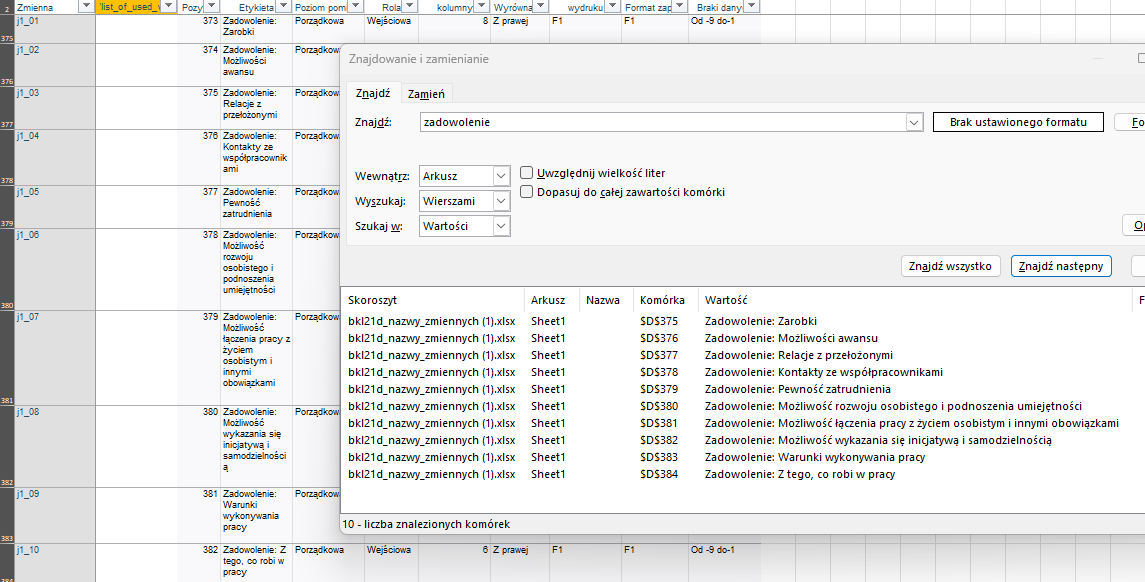

In [159]:
# tworzymy nową zmienną, w której wartości będą sumą wartości zmiennych "zadowolenia"- tj. j1_01...j1_10;

df_L1['zadowolenie_total'] = df_L1['j1_01'] + df_L1['j1_02'] + df_L1['j1_03'] + df_L1['j1_04'] + df_L1['j1_05'] + df_L1['j1_06'] + df_L1['j1_07'] + df_L1['j1_08'] + df_L1['j1_09'] + df_L1['j1_10']

In [162]:
df_L1[['j1_01', 'j1_02', 'j1_03', 'j1_04', 'j1_05', 'j1_06', 'j1_07', 'j1_08', 'j1_09', 'j1_10', 'zadowolenie_total']].head(15)

,j1_01,j1_02,j1_03,j1_04,j1_05,j1_06,j1_07,j1_08,j1_09,j1_10,zadowolenie_total
0,4.0,4.0,4.0,4.0,NaN,4.0,NaN,4.0,NaN,4.0,NaN
1,4.0,4.0,5.0,5.0,5.0,2.0,2.0,4.0,5.0,5.0,41.0
2,2.0,2.0,3.0,4.0,1.0,3.0,3.0,3.0,4.0,3.0,28.0
3,2.0,1.0,4.0,4.0,1.0,4.0,1.0,4.0,2.0,4.0,27.0
4,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,50.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.0,NaN,5.0,NaN,NaN,4.0,2.0,4.0,3.0,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4.0,3.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,46.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filtrujemy osoby starsze niż 30 lat

### {Założenie biznesowe} ponieważ od tego wieku nasi klienci postrzegą doradcę jako "dojrzały", tj. godny zaufania;

In [ ]:
print(df_1['m1'].head(10))
df_1['wiek_dzisiaj'] = 2025 - df_1['m1']
df_1['wiek_dzisiaj'].value_counts().plot(kind='bar')
plt.xlabel('Wiek respondenta')
plt.ylabel('Count')
plt.title('wiek_dzisiaj')
plt.show()

# 6 Wstępna wizualizacja danych

Do wizualizacji użyjemy pakietu ggplot2 https://github.com/rstudio/cheatsheets/blob/main/data-visualization.pdf

# Nowa sekcja